# <center>Favio Conde</center>

### <center>D208 - Predictive Modeling Task 1</center>

### <center>July 22, 2023</center>

### <center>WGU</center>

# Table of Contents

#### Part I: Research Question
 
 A1: Research Question
 
 A2: Goals
 
#### Part II: Method Justification

 B1: Summary of Assumption
 
 B2: Tool Benfits
 
 B3: Appropriate Technique
 
#### Part III: Data Preparation
 
 C1: Data Cleaning
 
 C2: Summary Statistics
 
 C3: Visualizations
 
 C4: Data Transformation
 
 C5: Prepared Data Set
 
#### Part IV:  Model Comparison and Analysis
 
 D1: Initial Model

 D2: Justification of Model Reduction
 
 D3: Reduced Linear Regression Model
 
 E1: Model Comparison

 E2: Output and Calculations
 
 E3: Code
 
 #### Part V: Data Summary and Implications
 
 F1. Results
 
 F2. Recommendations
 
 #### Part VI: Demonstration
 
 G. Provide a Pinopto Video Recording
 
 H. Third-Party Code Reference
 
 I. Sources

## PART I: RESEARCH QUESTION

### A1. Research Question

What variables in the dataset have a correlations with the grand total charges?

### A2. Goals

The goal of this analysis is to determine what factors affect the grand total charges for services rendered throughout the patients' stay at the hospital.  The grand total takes the additional charges and adds it to the product of the average per day cost and days of the initial stay.

## PART II: METHOD JUSTIFICATION

### B1. Summary of Assumption

The multiple linear regression makes several assumptions which include the list below.  If any assumption is violated, then there is a possibility that the linear regression model will give an inaccurate relationship result (Middleton, 2022).

<ol>
    <li>There is a linear relationship between the target variable and the explanatory variables.</li>
    <li>There is no multicollinearity amongst the independent variables.</li>
    <li>Residual values should follow a normal distribution with a mean of zero.</li>
    <li>The residuals have a constant variance for each independent variable (homoscedasticity).</li>
</ol>

### B2. Tool Benefits

To clean the data, I used Python because it handles large sets of data really well and it has many libraries that aid in efficiently analyzing data.  Python is extremely efficient in predictive analytics and statistics.

For the multiple linear regression analysis I used the following libraries:

<ul>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>Seaborn</li>
    <li>Matplotlib</li>
    <li>Statsmodels</li>
    <li>Sklearn</li>
    <li>Scipy</li>
</ul>

### B3. Appropriate Technique

Based on the independent variable being a continuous variable, a multiple linear regression is the appropriate technique to use for analyzing what variables in the data set have a correlations with the grand total charges.

This technique uses two or more explanatory variables to predict the target variable.  Through this analysis method, we are able to determine to what extent each independent variable causes a variation in the model.

## PART III: DATA PREPARATION

### C1. Data Cleaning

Regression analysis is sensitive to outliers so it was important to clean the data.  

First, I reviewed the data types to assess if value types seemed to be accurate.  Next, I checked for null or duplicate values.  I did not find any null or duplicate values, so I did not treat any.

I observed outliers in the quantitative variables 'Population', 'Children', 'Income', 'VitD_levels', 'Full_meals_eaten', 'VitD_supp', and 'Additional_charges'.  There were 3 outlies in 'Children', 2 in 'Full_meats_eaten', 3 in 'VitD_supp', and many outliers in the rest identified in the previous sentence.  All outliers observed were greater than the fourth quartile, with the exception of 'VitD_supp' which had outliers at both extremes.

I did not treat the outliers since they appear to be legitimate observations.  For example, it's reasonable that there are some patients that have more  children than others, or more income.

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from scipy import stats

In [2]:
# Importing medical_clean.csv file into Jupyter
df = pd.read_csv('C:/Users/Favio/Documents/Education/WGU/MSDA/D208/PA/Files/medical_clean.csv')

In [3]:
# Adding 'Grand_total' as [('Initial_days' * 'TotalCharge') + 'Additional_charges']
df['Grand_total'] = round((df['Initial_days']*df['TotalCharge']) + df['Additional_charges'],2)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Grand_total
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,17939.403420,3,3,2,2,4,3,3,4,57389.42
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,17612.998120,3,4,3,4,4,4,3,3,81054.13
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,17505.192460,2,4,4,4,3,4,3,3,29121.79
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,12993.437350,3,5,5,3,4,5,5,5,16642.41
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,3716.525786,2,1,3,3,5,3,4,3,6368.03


In [4]:
# Checking the shape of df
df.shape

(10000, 51)

In [5]:
# Checking value types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

From the '.info()' and '.isnull().sum()' functions we can see that there are no null values in the data.

We can also see that the following are continuous variables:
<ul>
    <li>CaseOrder</li>
    <li>Zip</li>
    <li>Lat</li>
    <li>Lng</li>
    <li>Population</li>
    <li>Children</li>
    <li>Age</li>
    <li>Income</li>
    <li>VitD_levels</li>
    <li>Doc_visits</li>
    <li>Full_meals_eaten</li>
    <li>vitD_supp</li>
    <li>Initial_days</li>
    <li>TotalCharge</li>
    <li>Additional_charges</li>
    <li>Item1</li>
    <li>Item2</li>
    <li>Item3</li>
    <li>Item4</li>
    <li>Item5</li>
    <li>Item6</li>
    <li>Item7</li>
    <li>Item8</li>
    <li>Grand_total</li>
</ul>
Of the continuous variables, most are truly qualitative data and/or not relevant to the analysis.  For example, zip is really a categorical variable because it wouldn't make sense to perform mathematical operations on it.  Additionally, 'CaseOrder', 'Customer_id', 'Lat', 'Lat', and each one of the 'Item' variables are not important to the analysis.

<b>Checking for null values in the data set</b>

In [6]:
# Checking for null values
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

<b>Checking for duplicates in the data set</b>

In [7]:
# Checking for duplicates
df.duplicated().value_counts()

False    10000
dtype: int64

All 10,000 entries are false which confirms there are no duplicates.

<b>Checking for outliers in all quantitative variables using box plots</b>

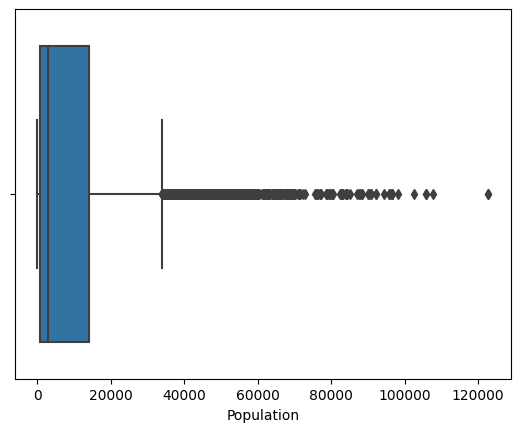

In [8]:
sns.boxplot(data=df, x='Population');

The distribution is skewed to the right with a median around 1,000.  75% of the patients live in an area with a population of around 15,000 or less.  The data has a lot of outliers.

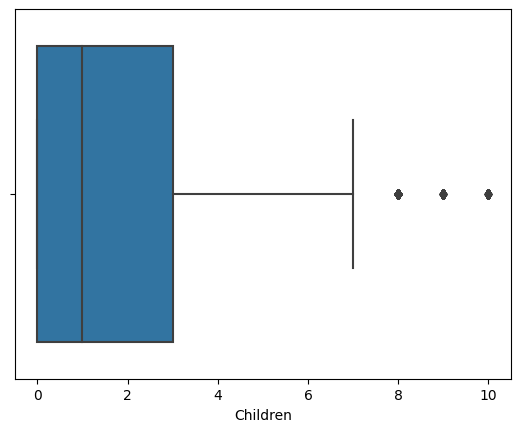

In [9]:
sns.boxplot(data=df, x='Children');

The distribution is skewed to the right with a median of 1.  75% of the patients have 3 children or less.  The data has very few outliers.

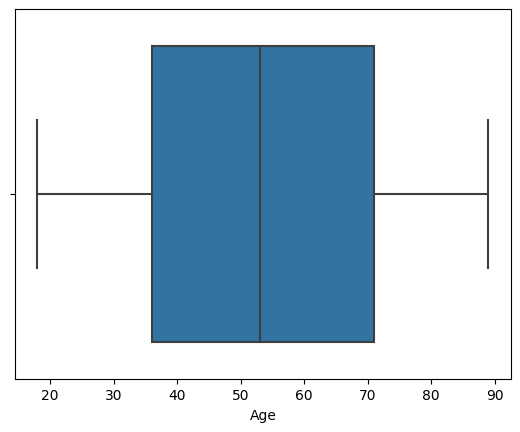

In [10]:
sns.boxplot(data=df, x='Age');

The distribution ir normal with a median of around 53.  75% of the patients are 71 years old or younger.  The variable does not have any outliers.

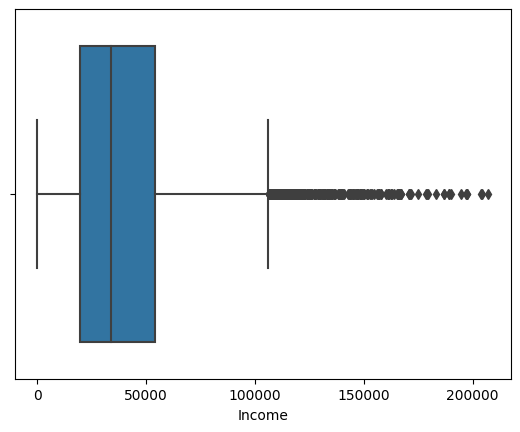

In [11]:
sns.boxplot(data=df, x='Income');

The distribution is skewed to the right with a median of around 33,000.  75% of the patients have an income of a little over 50,000 or less.  The data has a lot of outliers.

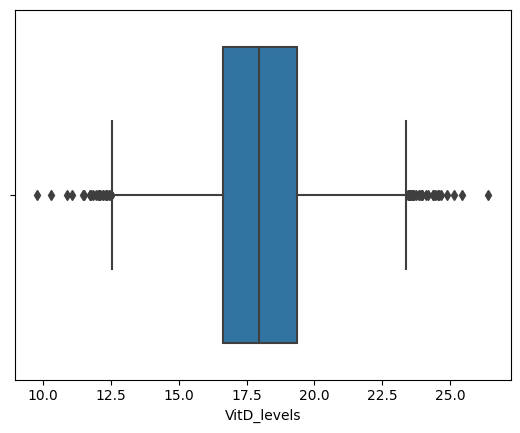

In [12]:
sns.boxplot(data=df, x='VitD_levels');

The distribution is normal with a median of around 18.  75% of the patients have a vitamin D level around 19 or less.  The data has many outliers at both extremes.

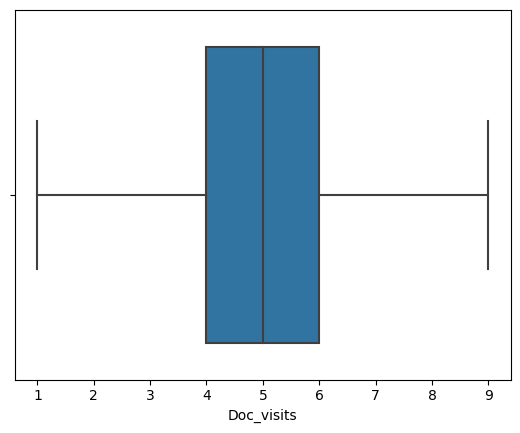

In [13]:
sns.boxplot(data=df, x='Doc_visits');

The distribution is normal with a median of 5.  75% of the patients had 6 doctor visits or less.  The data does not have any outliers.

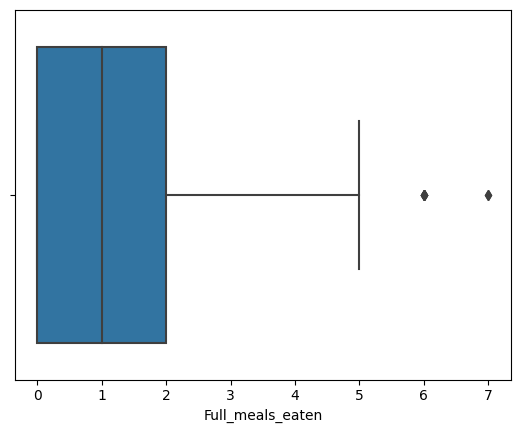

In [14]:
sns.boxplot(data=df, x='Full_meals_eaten');

The distribution is skewed to the right with a median of 1.  75% of the patients ate 2 full meals or less.  The data has very few outliers.

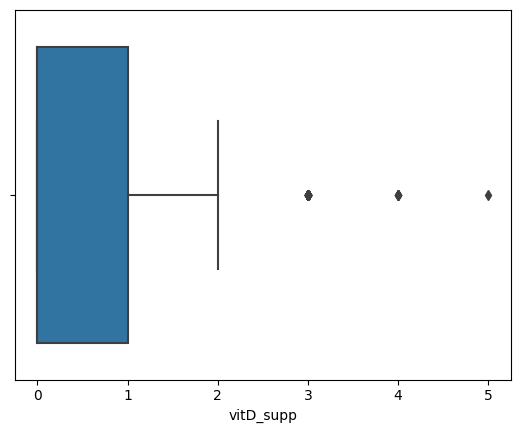

In [15]:
sns.boxplot(data=df, x='vitD_supp');

The distribution is skewed to the right with a median of 0.  75% of the patients had 1 vitamin D supplement or less.  The data has very few outliers.

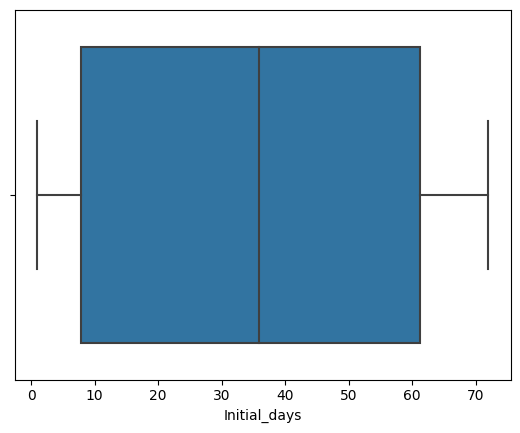

In [16]:
sns.boxplot(data=df, x='Initial_days');

The distribution is normal with a median around 35 days.  75% of the patients stayed for 61 days or less.  The data has no outliers.

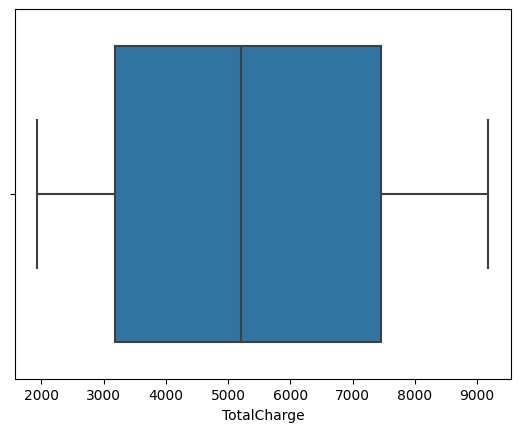

In [17]:
sns.boxplot(data=df, x='TotalCharge');

The distribution is normal with a median around 5,200.  75% of the patients had an average daily charge of 7,500 children or less.  The data has no outliers.

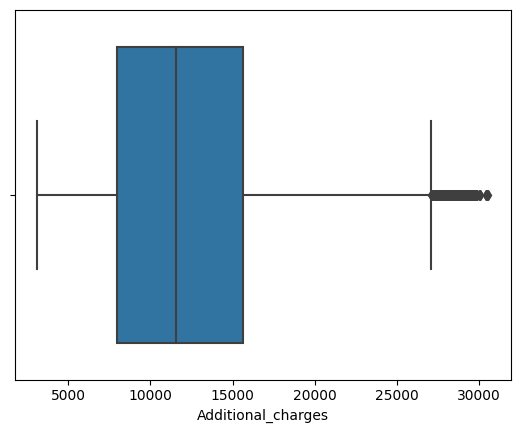

In [18]:
sns.boxplot(data=df, x='Additional_charges');

The distribution is skewed to the right with a median around 11,000.  75% of the patients had additional charges of 16,000 or less.  The data has many outliers.

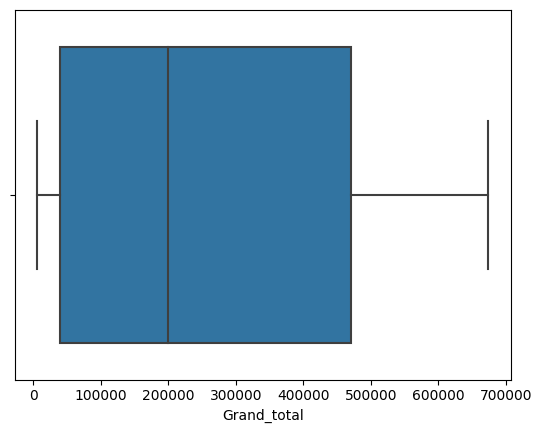

In [19]:
sns.boxplot(data=df, x='Grand_total');

The distribution is skewed slightly to the right with a median around 200,000. 75% of the patients had a grand total of around 460,000 or less. The data has no outliers.

I did not treat the outliers since they appear to be legitimate observations. For example, it's reasonable that there are some patients that have more children than others, or more income.

### C2. Summary Statistics

For the independent continuous variables, I have selected to use 'Population','Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', and 'Additional_charges'; and for the independent categorical variable I have selected to use 'ReAdmis'.  These are the variables I believe will have an affect on the 'Grand_total' and the variables I will use for my initial model.

In [20]:
# Checking statistical description of continuous variables from df where the numerical component is relevant
cat =  ['Population','Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Grand_total']
df[cat].describe().T

,count,mean,std,min,25%,50%,75%,max
Population,10000.0,9965.253800,14824.758614,0.000000,694.750000,2769.000000,13945.000000,122814.000000
Children,10000.0,2.097200,2.163659,0.000000,0.000000,1.000000,3.000000,10.000000
Age,10000.0,53.511700,20.638538,18.000000,36.000000,53.000000,71.000000,89.000000
Income,10000.0,40490.495160,28521.153293,154.080000,19598.775000,33768.420000,54296.402500,207249.100000
VitD_levels,10000.0,17.964262,2.017231,9.806483,16.626439,17.951122,19.347963,26.394449
Doc_visits,10000.0,5.012200,1.045734,1.000000,4.000000,5.000000,6.000000,9.000000
Full_meals_eaten,10000.0,1.001400,1.008117,0.000000,0.000000,1.000000,2.000000,7.000000
vitD_supp,10000.0,0.398900,0.628505,0.000000,0.000000,0.000000,1.000000,5.000000
Initial_days,10000.0,34.455299,26.309341,1.001981,7.896215,35.836244,61.161020,71.981490
TotalCharge,10000.0,5312.172769,2180.393838,1938.312067,3179.374015,5213.952000,7459.699750,9180.728000


The summary statistic provides a lot of information relating to the independent continuous variables in the dataset.

Below is a description of each column:
<ul>
    <li>count: shows the count for each variable</li>
    <li>mean: shows the average for each variable, which is calculated by summing all of the values and dividing by the count</li>
    <li>std: shows the standard deviation for each variable, which tells us how disbursed the data is related to the mean of the variable</li>
    <li>min: shows the minimum value for each variable</li>
    <li>25%: shows the value where 25% of the ordered data falls under</li>
    <li>50%: shows the value where 50% of the ordered data falls under</li>
    <li>75%: shows the value where 75% of the ordered data falls under</li>
    <li>max: shows the maximum value for each variable</li>
</ul>

Based on the table, we can see that on average patient profile includes:
<ul>
    <li>has 2 children</li>
    <li>53 years old</li>
    <li>make 40,490.50</li>
    <li>have a vitamin D level of almost 18 mg/mL</li>
    <li>had 5 doctor visits during initial admission</li>
    <li>had 1 full meal</li>
    <li>had less than 1 vitamin D supplement</li>
    <li>stayed for 34 days in the initial admission</li>
    <li>paid an average of 5,312.17 in total charges per day of initial stay</li>
    <li>paid 12,934.53 in additional charges</li>
    <li>paid 252,617.08 for the grand total of the hospitalization</li>
</ul>

In [21]:
df['ReAdmis'].value_counts(normalize=True)*100

No     63.31
Yes    36.69
Name: ReAdmis, dtype: float64

In 63.31% of the dataset, patients were not readmitted; 36.69% of the time patients were readmitted.

### C3. Visualizations

<b>Univariate Visualizations</b>

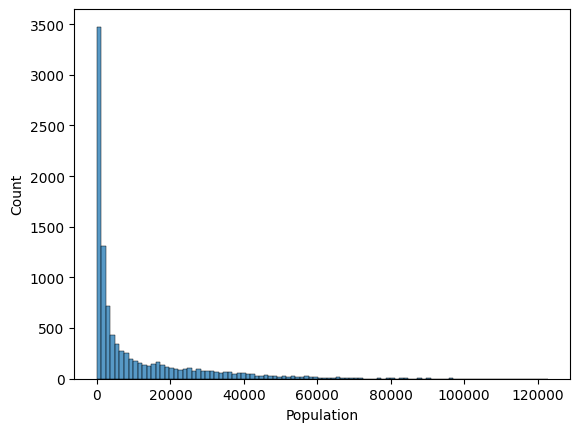

In [22]:
sns.histplot(data=df, x='Population');

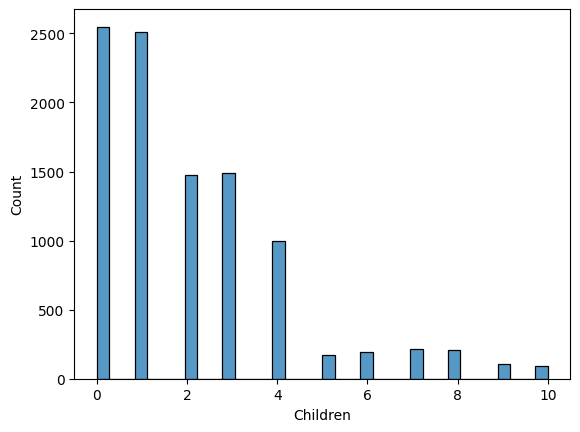

In [23]:
sns.histplot(data=df, x='Children');

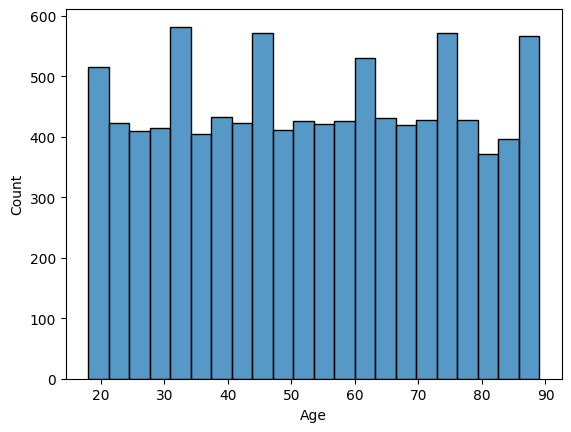

In [24]:
sns.histplot(data=df, x='Age');

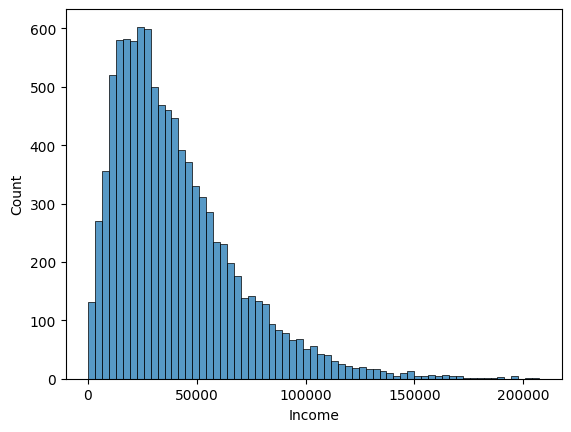

In [25]:
sns.histplot(data=df, x='Income');

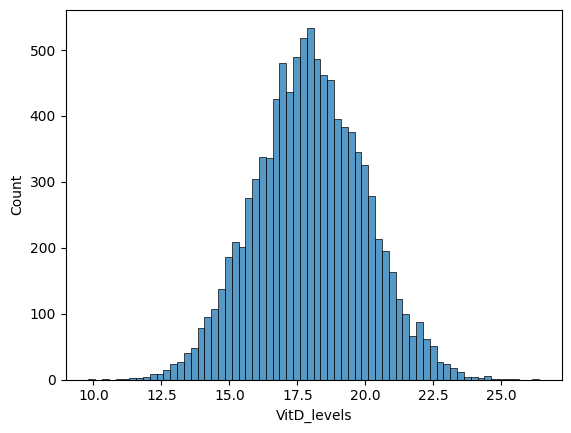

In [26]:
sns.histplot(data=df, x='VitD_levels');

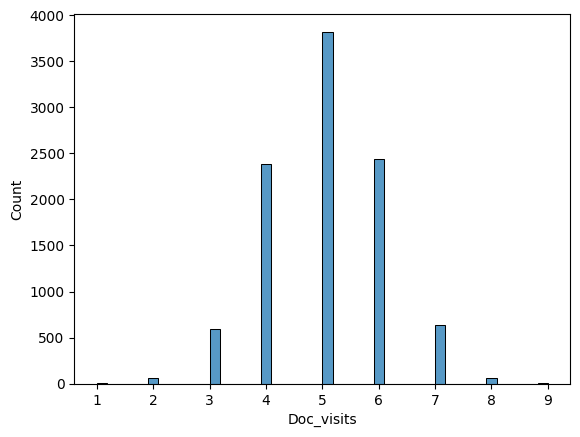

In [27]:
sns.histplot(data=df, x='Doc_visits');

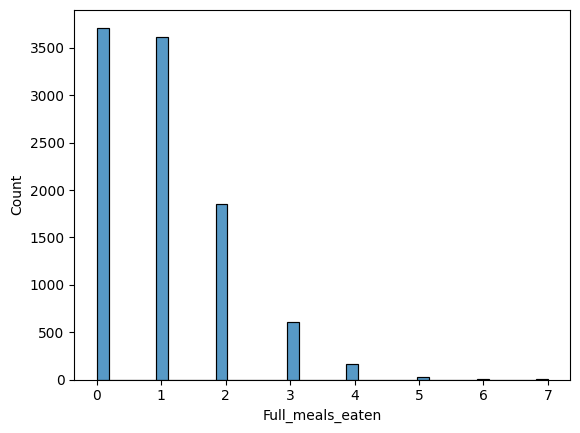

In [28]:
sns.histplot(data=df, x='Full_meals_eaten');

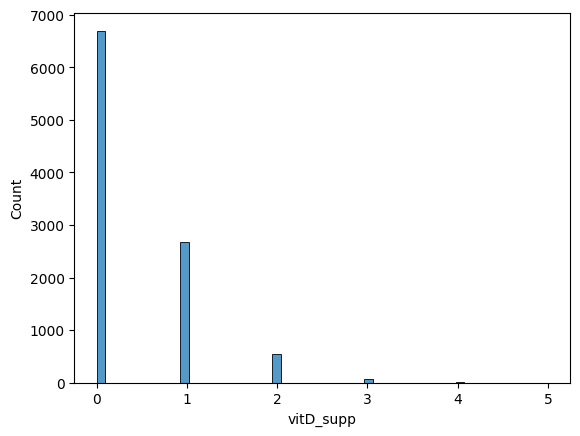

In [29]:
sns.histplot(data=df, x='vitD_supp');

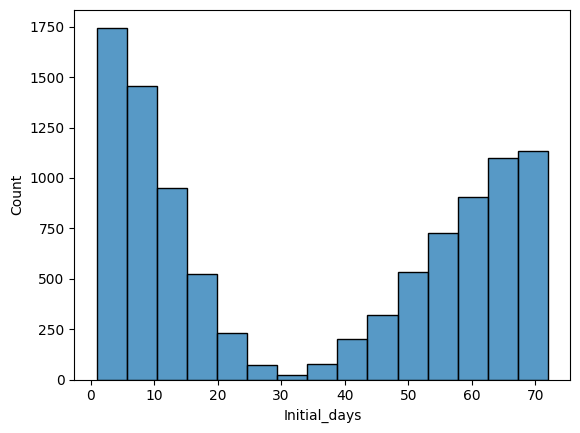

In [30]:
sns.histplot(data=df, x='Initial_days');

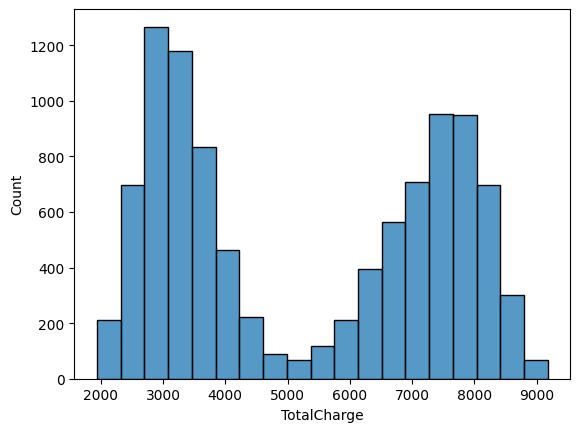

In [31]:
sns.histplot(data=df, x='TotalCharge');

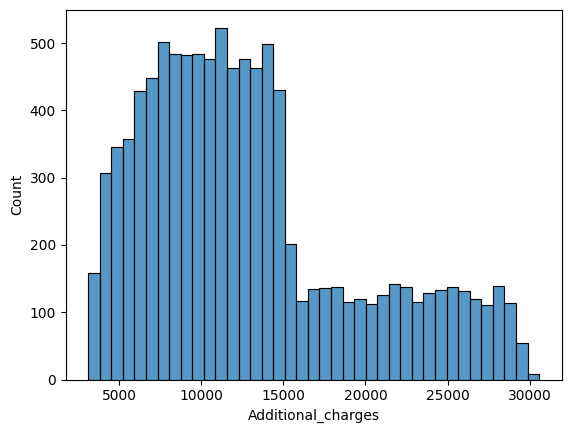

In [32]:
sns.histplot(data=df, x='Additional_charges');

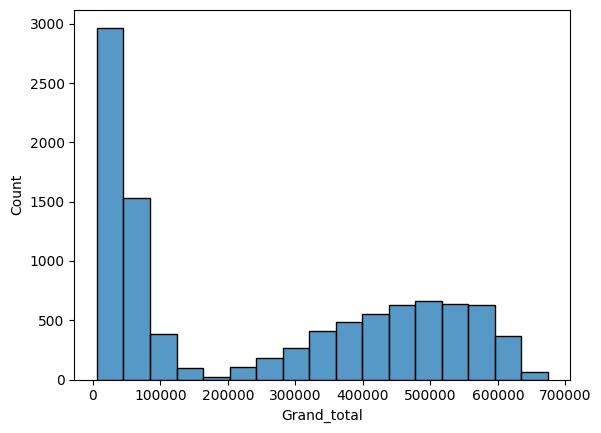

In [33]:
sns.histplot(data=df, x='Grand_total');

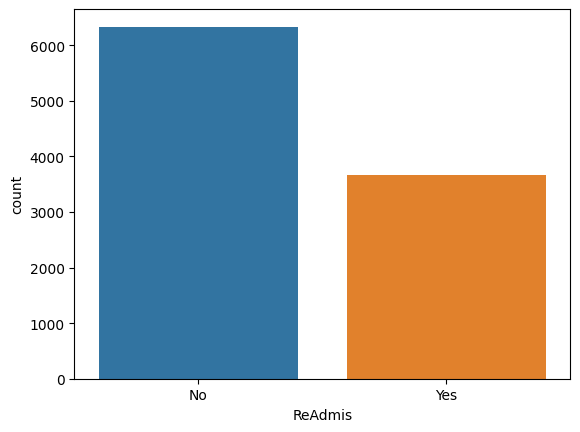

In [34]:
sns.countplot(data=df, x='ReAdmis');

<b>Bivariate Visualizations</b>

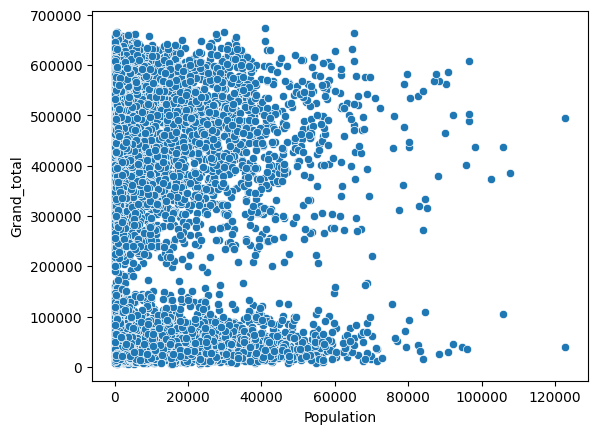

In [35]:
sns.scatterplot(data=df, x='Population', y='Grand_total');

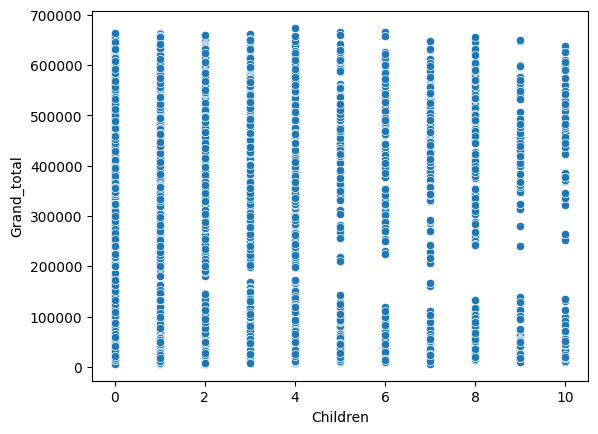

In [36]:
sns.scatterplot(data=df, x='Children', y='Grand_total');

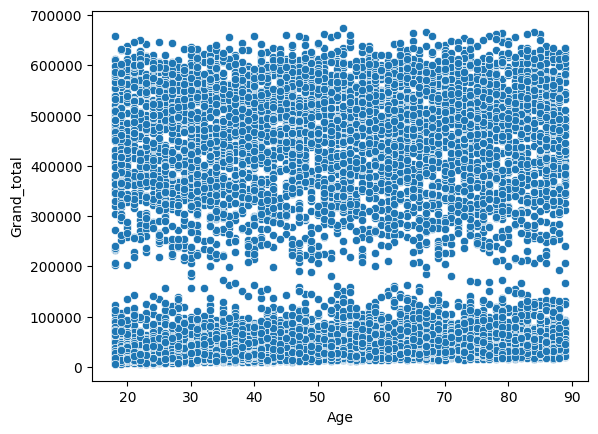

In [37]:
sns.scatterplot(data=df, x='Age', y='Grand_total');

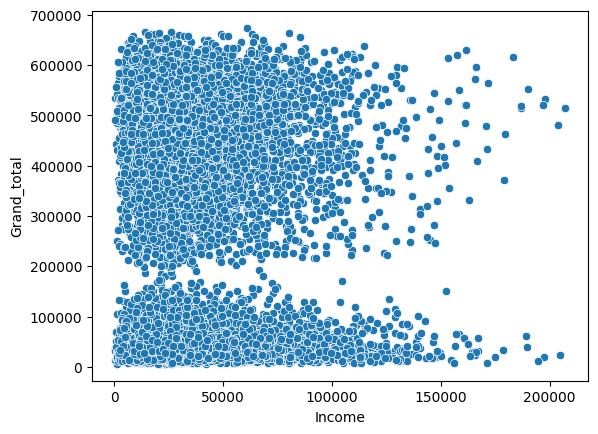

In [38]:
sns.scatterplot(data=df, x='Income', y='Grand_total');

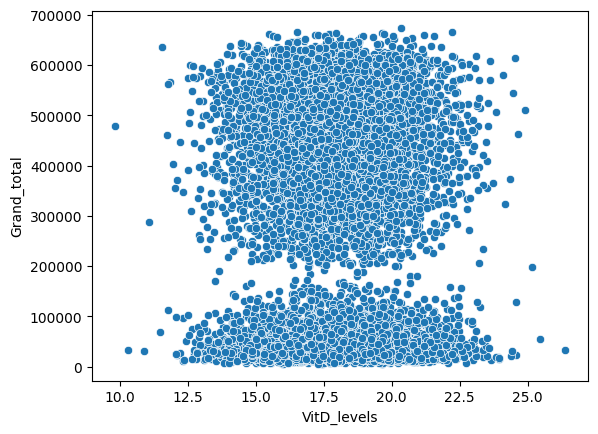

In [39]:
sns.scatterplot(data=df, x='VitD_levels', y='Grand_total');

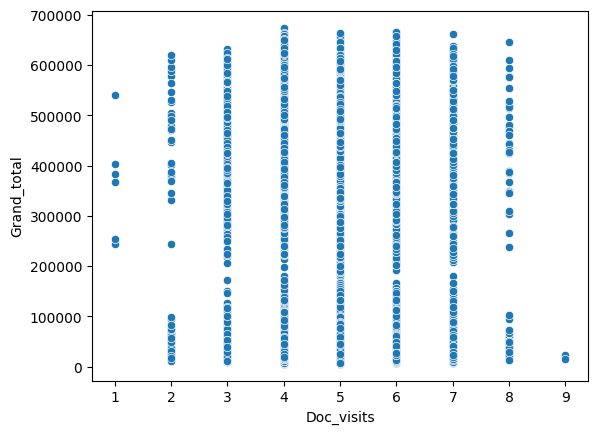

In [40]:
sns.scatterplot(data=df, x='Doc_visits', y='Grand_total');

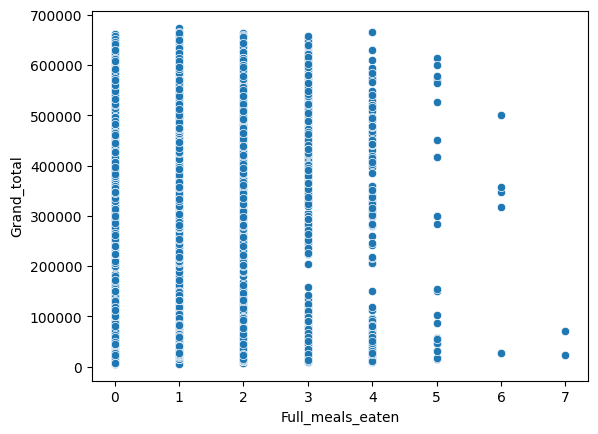

In [41]:
sns.scatterplot(data=df, x='Full_meals_eaten', y='Grand_total');

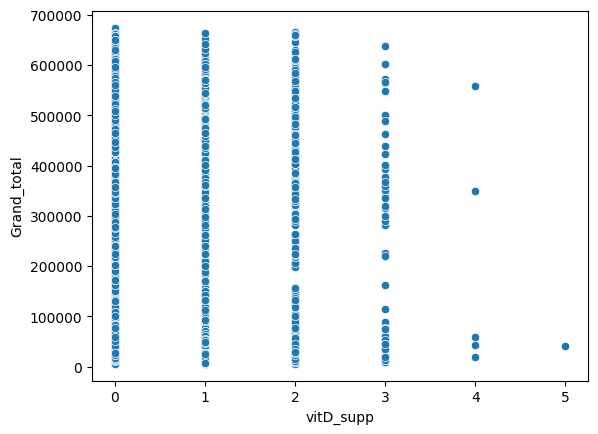

In [42]:
sns.scatterplot(data=df, x='vitD_supp', y='Grand_total');

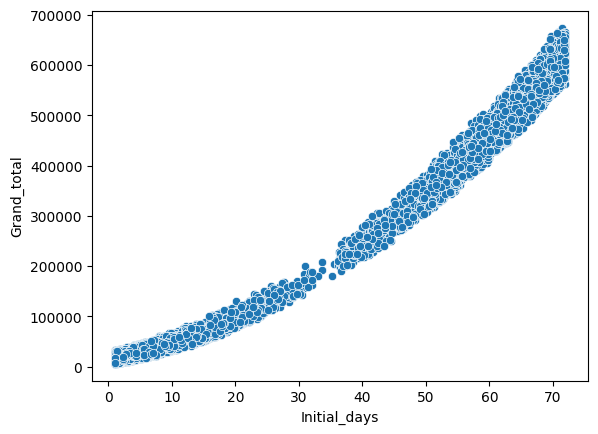

In [43]:
sns.scatterplot(data=df, x='Initial_days', y='Grand_total');

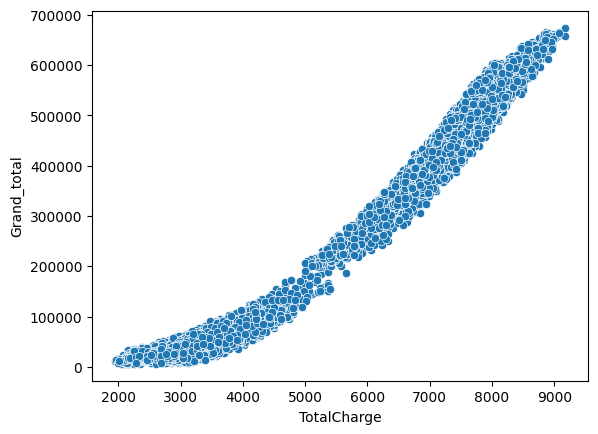

In [44]:
sns.scatterplot(data=df, x='TotalCharge', y='Grand_total');

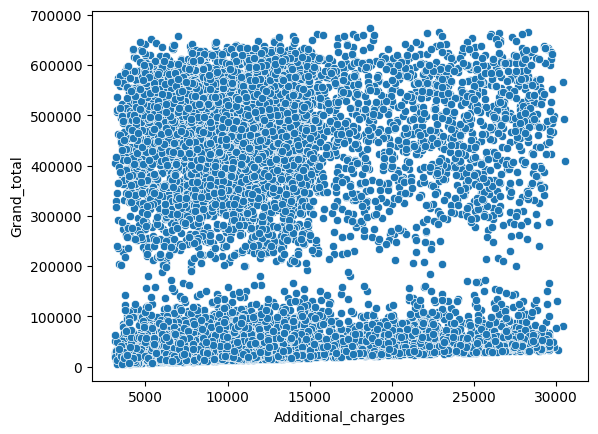

In [45]:
sns.scatterplot(data=df, x='Additional_charges', y='Grand_total');

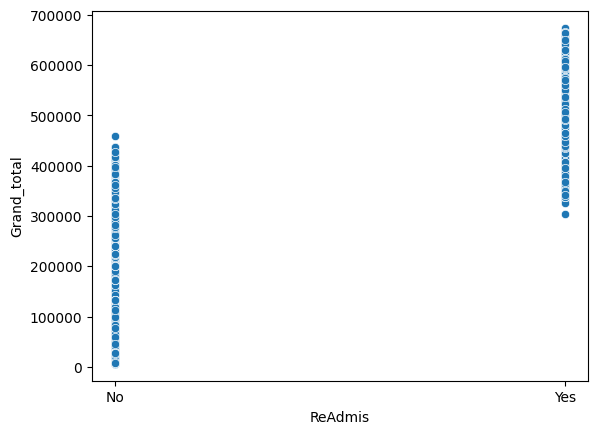

In [46]:
sns.scatterplot(data=df, x='ReAdmis', y='Grand_total');

Based on the bivariate visualizations, 'Grand_total' has a strong positive correlations with 'Initial_days' and 'TotalCharge'.

### C4. Data Transformation

'ReAdmis' is a categorical independent variable that I have re-expressed to convert No/Yes to 0/1, respectively, by using a ordinal encoder technique.  By re-expressing the 'ReAdmis' varbiable and converting it to a numeric data type, I'm now able to include this variable in my analysis.

In [48]:
# Re-expressing 'ReAdmis' No/Yes as 0/1
df['ReAdmis'] = df['ReAdmis'].map({'No': 0, 'Yes': 1})

In [49]:
# Checking to see if the ratios are identical to the variable before creating dummy variables
df['ReAdmis'].value_counts(normalize=True)*100

0    63.31
1    36.69
Name: ReAdmis, dtype: float64

I confirmed that the distribution is identical for the 'ReAdmis' variable before and after the re-expression was performed

### C5. Prepared Data Set

To prepare the data, I removed all variables that will not be used in the MLR analysis, and standardized the numeric data.  I did not standardize the categorical variable because the assigned 0 and 1 are arbitrary, and applying mathematical operations using the mean and standard deviation does not make sense.

In [50]:
# Removing all variables that will not be used in the MLR model
# Also removing 'ReAdmis' in order to not standardized the re-expressed categorical variable
var = ['Population','Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Grand_total']
standard = df[var]

In [51]:
# Standardaizing numeric variables
standard = preprocessing.scale(standard)
standard = pd.DataFrame(standard, columns = var)

# Re-adding 'ReAdmis' to the data
standard['ReAdmis'] = df['ReAdmis']
standard

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Grand_total,ReAdmis
0,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,0.765005,-0.885711,0
1,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,0.715114,-0.778349,0
2,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,0.698635,-1.013956,0
3,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,0.009004,-1.070573,0
4,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,-1.408991,-1.117186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.351002,-0.044926,-1.381548,0.192047,-0.487525,-0.967981,0.990609,0.956445,0.650217,0.705765,-0.612461,0.497024,0
9996,-0.587847,0.879480,1.622691,-0.894380,0.105476,-0.011667,-0.993387,-0.634713,1.300475,1.114312,2.380307,1.395062,1
9997,-0.636349,0.417277,-0.412438,0.891569,-0.414049,-0.967981,0.990609,-0.634713,1.356958,1.359597,0.358695,1.557460,1
9998,-0.653956,0.417277,-0.509349,-0.378271,0.964820,-0.011667,0.990609,0.956445,1.098585,1.069727,-0.787624,1.086545,1


In [52]:
# Extracting prepared dataset to CSV file
standard.to_csv(r'C:/Users/Favio/Documents/Education/WGU/MSDA/D208/PA/Files/medical_prepared.csv')

## PART IV: MODEL COMPARISON AND ANALYSIS

### D1. Initial Model

For the initial model, I am using the OLS Regression Results shown on Dr. Sewell's PowerPoint prenstation for Episode 4 on slide 48.

In [53]:
# Defining x as all of the independent variables, and y as the dependent variable
x = standard[['Population','Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]
y = standard['Grand_total']

# Adding a constant
x = sm.add_constant(x)

# Running OLS for the regression results
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Grand_total   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 7.213e+04
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:37:01   Log-Likelihood:                 8178.6
No. Observations:               10000   AIC:                        -1.633e+04
Df Residuals:                    9987   BIC:                        -1.624e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1142      0

### D2. Justification of Model Reduction

For model reduction, I used the backward stepwise elimination wrapper method by reviewing the p-value of the OLS output, and eliminating, one-by-one, the variable with the highest p-value and creating a new OLS summary.  I repeated this step until I was only left with variables with a p-value of <= 0.05.  The reason for using a p-value of 0.05 as the filtering value is that any p-value <= 0.05 tells us that it is not likely by chance that the variable is highly correlated to the target variable.  Higher p-values indicate that the variable is less significant.

In the initial iteration, the highest p-value was for 'VitD_levels' at 0.927.  In the second model, 'Doc_visits' had the highest p-value at 0.526; this variable was dropped.  In the third iteration, I dropped 'Full_meals_eaten' since it had a p-value of 0.421.  Next, I dropped 'Income' with a p-value of 0.375, followed by 'vitD_supp' with a p-value of 0.241, 'Children' with a p-value of 0.256, 'Age' with a p-value of 0.124, and lastly, 'Population' with a p-value of 0.110.

The remaining explanatory variables are: 'Initial_days', 'TotalCharge', 'Additional_charges', and 'ReAdmis'.

With the remaining explanatory variables, I used variance inflation factor and a heatmap to check for multicollinearity.  Based on both method, 'Initial_days' and 'TotalCharge' are highly correlated to the other independent variables.  It makes sense that both of these variables are really saying the same thing since the 'TotalCharge' is a calculation based on the 'Initial_days', so I kept 'Initial_days' only and dropped 'TotalCharge'.

After dropping 'TotalCharge' I ran variance inflation factor again.  This time the resuls of the three remaining independent variables ('Initial_days', 'Additional_charges', and 'ReAdmis') where all less than 5, so I kept all three variables in the final reduced regression model.

<b>Model reduction process</b>

In [54]:
# Defining x as all of the independent variables, and y as the dependent variable
x = standard[['Population','Children', 'Age', 'Income', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]

# Adding a constant
x = sm.add_constant(x)

# Running OLS for the regression results
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Grand_total   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 7.870e+04
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:38:30   Log-Likelihood:                 8178.6
No. Observations:               10000   AIC:                        -1.633e+04
Df Residuals:                    9988   BIC:                        -1.625e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1142      0

In [55]:
# Defining x as all of the independent variables, and y as the dependent variable
x = standard[['Population','Children', 'Age', 'Income', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]

# Adding a constant
x = sm.add_constant(x)

# Running OLS for the regression results
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Grand_total   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 8.657e+04
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:38:45   Log-Likelihood:                 8178.4
No. Observations:               10000   AIC:                        -1.633e+04
Df Residuals:                    9989   BIC:                        -1.626e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1142      0

In [56]:
# Defining x as all of the independent variables, and y as the dependent variable
x = standard[['Population','Children', 'Age', 'Income', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]

# Adding a constant
x = sm.add_constant(x)

# Running OLS for the regression results
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Grand_total   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 9.619e+04
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:39:06   Log-Likelihood:                 8178.1
No. Observations:               10000   AIC:                        -1.634e+04
Df Residuals:                    9990   BIC:                        -1.626e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1142      0

In [57]:
# Defining x as all of the independent variables, and y as the dependent variable
x = standard[['Population','Children', 'Age', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]

# Adding a constant
x = sm.add_constant(x)

# Running OLS for the regression results
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Grand_total   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.082e+05
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:39:14   Log-Likelihood:                 8177.7
No. Observations:               10000   AIC:                        -1.634e+04
Df Residuals:                    9991   BIC:                        -1.627e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1142      0

In [58]:
# Defining x as all of the independent variables, and y as the dependent variable
x = standard[['Population','Children', 'Age', 'Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]

# Adding a constant
x = sm.add_constant(x)

# Running OLS for the regression results
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Grand_total   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.237e+05
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:39:23   Log-Likelihood:                 8177.0
No. Observations:               10000   AIC:                        -1.634e+04
Df Residuals:                    9992   BIC:                        -1.628e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1142      0

In [59]:
# Defining x as all of the independent variables, and y as the dependent variable
x = standard[['Population', 'Age', 'Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]

# Adding a constant
x = sm.add_constant(x)

# Running OLS for the regression results
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Grand_total   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.443e+05
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:39:27   Log-Likelihood:                 8176.3
No. Observations:               10000   AIC:                        -1.634e+04
Df Residuals:                    9993   BIC:                        -1.629e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1141      0

In [60]:
# Defining x as all of the independent variables, and y as the dependent variable
x = standard[['Population', 'Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]

# Adding a constant
x = sm.add_constant(x)

# Running OLS for the regression results
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Grand_total   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.731e+05
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:39:45   Log-Likelihood:                 8175.1
No. Observations:               10000   AIC:                        -1.634e+04
Df Residuals:                    9994   BIC:                        -1.630e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1142      0

In [61]:
# Defining x as all of the independent variables, and y as the dependent variable
x = standard[['Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]

# Adding a constant
x = sm.add_constant(x)

# Running OLS for the regression results
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Grand_total   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.164e+05
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:39:57   Log-Likelihood:                 8173.9
No. Observations:               10000   AIC:                        -1.634e+04
Df Residuals:                    9995   BIC:                        -1.630e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1141      0

<b>Checking for multicollinearity</b>

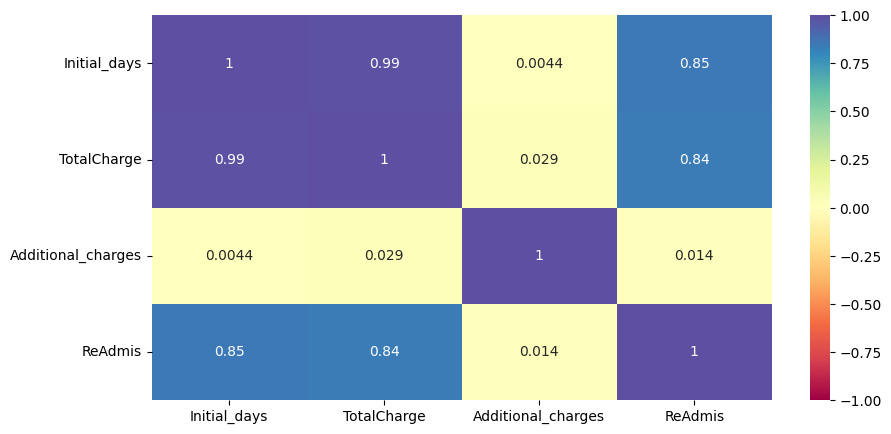

In [62]:
# Creating variable and adding variables I wish to test for multicollinearity
var2 = ['Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']
corr = standard[var2].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()


In [63]:
# Using VIF to test for multicollinearity; code is from Dr. Sewell's Episode 1 PowerPoint on slide 27.

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = standard[['Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

              Feature        VIF
0        Initial_days  42.333496
1         TotalCharge  41.779604
2  Additional_charges   1.025966
3             ReAdmis   1.847282


In both methods, 'Initial_days' and 'TotalCharge' are highly correlated, so I have decided to drop 'TotalCharge' since it is heavily based on the 'Initial_days' in its definition.

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = standard[['Initial_days', 'Additional_charges', 'ReAdmis']]

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

              Feature       VIF
0        Initial_days  1.846214
1  Additional_charges  1.000133
2             ReAdmis  1.846395


After running the VIF again, all three variables are < 5 so I decided to keep all three.

### D3. Reduced Linear Regression Model

In [65]:
# Defining x as all of the independent variables, and y as the dependent variable
x = standard[['Initial_days', 'Additional_charges', 'ReAdmis']]

# Adding a constant
x = sm.add_constant(x)

# Running OLS for the regression results
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Grand_total   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.356e+05
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:41:41   Log-Likelihood:                 7173.5
No. Observations:               10000   AIC:                        -1.434e+04
Df Residuals:                    9996   BIC:                        -1.431e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1169      0

### E1. Model Comparison

In the initial model I had 12 explanatory variables, and in the reduced model I had 3 explanatory variables.  The adjusted R-Squareds are very similar for both the initial and reduced regression models; the reduced model is lower by 0.003.  Both  models also had a Prob(F-Statistic) of 0, which indicates that overall, the regression model is meaningful (Middleton, 2022).

However, the scatter plot graph is somewhat in the shape of a smile, which lacks linearity amongst the independent variables.  Transforming the independent variables using a log could help.  Since the plot shows a pattern, this means that the regression model does is not a good fit for the data (Z, 2023), which is opposite of what the adjusted R-squared is telling us.  The scatter plot tells us that the residuals suffer from heteroscedasticity (Z, 2022).

The Q-Q plot does not closely follow the 45 degree line which suggests that the residual model is not normally distributed which is confirmed in the reduced model's OLS Regression Results; specifically the Prob(Omnibus) result of 0.  I graphed the 'Residual' on a box plot and a histogram to better interpret the Q-Q plot.  Based on the two last graphs, the data does appear to have a normal distribution, however, there are a lot of outliers and regression modeling is very sensitive to outliers.  In Part III C1, I did notice that 'Additional_charges' had outliers, however, I decided to not treat the outliers since it's logical that based on differing medical conditions and treatments, some patients will have higher additional expenses.

### E2. Output and Calculations

I calculated a 'Predicted' value based on the OLS results from D3 and added it as a column to the standard dataframe.  I subtracted the 'Predicted' value from the 'Grand_total' to calculate the 'Residual' values and added it to the data.

In [67]:
# Adding a column to predict the 'Grand_total' based on the results from the OLS (Sewell, 2017)
standard['Predicted'] = model.predict(x)

# Also adding a column to calculate the residual value as 'Grand_total' minus 'Predicted'
standard['Residual'] = standard['Grand_total'] - standard['Predicted']

# Checking to make sure the columns were added properly to the dataframe
standard.iloc[:, -4:]

,Grand_total,ReAdmis,Predicted,Residual
0,-0.885711,0,-0.866604,-0.019107
1,-0.778349,0,-0.720287,-0.058062
2,-1.013956,0,-1.058724,0.044768
3,-1.070573,0,-1.184468,0.113895
4,-1.117186,0,-1.252990,0.135804
...,...,...,...,...
9995,0.497024,0,0.417862,0.079161
9996,1.395062,1,1.407520,-0.012459
9997,1.557460,1,1.379689,0.177771
9998,1.086545,1,1.114726,-0.028181


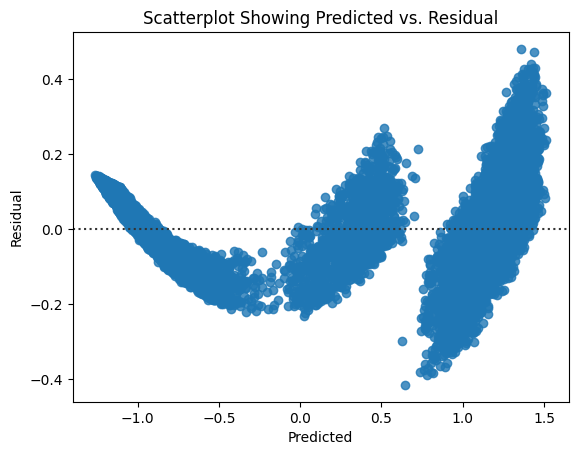

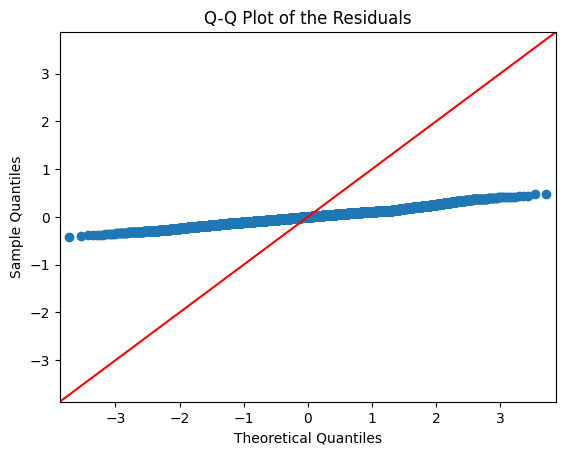

In [68]:
# Created scatter plot of the Predicted and Residual values
sns.residplot(data=standard, x=standard['Predicted'], y=standard['Residual'])
plt.title('Scatterplot Showing Predicted vs. Residual')
plt.show()


# Created a Q-Q plot of the residual values (Z., 2020)
sm.qqplot(standard['Residual'], line='45')
plt.title('Q-Q Plot of the Residuals')
plt.show()

In [ ]:
sns.boxplot(data=standard, x='Residual');
plt.show()

sns.histplot(data=standard, x='Residual');
plt.show()

The scatter plot graph is somewhat in the shape of a smile, which lacks linearity amongst the independent variables.  Transforming the independent variables using a log could help.  Since the plot shows a pattern, this means that the regression model does is not a good fit for the data (Z, 2023).

The Q-Q plot does not closely follow the 45 degree line which may suggeset that that the residual model is not normally distributed.  This is also confirmed in the reduced model's OLS Prob(Omnibus) result of 0.

In [69]:
# Calculated residual standard error of reduced model (Z., 2021)
rse_reduced = np.sqrt((((standard['Grand_total'] - standard['Predicted']).sum())**2/(standard.shape[0]-x.columns.shape[0]-1)))
rse_reduced

4.1968041868930435e-14

In [70]:
# Since the data has been normalized, using the target variable's standard deviation to interpret the RSE
np.std(df['Grand_total']) * rse_reduced

9.250558898975763e-09

The RSE tells us that the regression model predicts the 'Grand_total' for patients with an average error of 9.25e-9 dollars around the mean.

### E3. Code

The code can be found throughout the document.

## PART V: DATA SUMMARY AND IMPLICATIONS

### F1. Results

Based on the OLS Regression Results from part D3, the regression equation would be y = -0.1169 + 0.8581*('Initial_days) + 0.0377*('Additional_charges') + 0.3187*('ReAdmis').

The interpretation of the formula is tied to the standard deviation of each variable since the data has been standardized.  The formula tells us that before any of the explanatory variables affect the grand total, the cost is -0.1169 times the standard deviation of the 'Grand_total'.

The second coefficient in the formula tells us that for each day in the patient's initial stay results in a total cost increase of 0.8581 times the standard deviation of 'Initial_days', which is 26.309341.  The product is 22.58, which means that each day added to the patient's initial days increases the grand total by 22.58 dollars.

The third coefficient in the formula tells us that for each dollar in additional charges in the patient's cost results in a total cost increase of 0.0377 times the standard deviation of 'Additional_charges', which is 6542.601544.  The product is 246.66, which means that each dollar in additional charges added to the patient's cost increases the grand total by 246.66 dollars.

The fourth coefficient in the formula tells us that the patient being readmitted results in a total cost increase of 0.3187 dollars.

Based on the multiple linear regression analysis and the results of the OLS Regression Results, the statistical information, such as the adjusted R-Squared result, tells us that the model has statistical significance.  This tells us that the selected independent variables used in the regression model appropriate model the date.

However, the statistical significant doesn't imply practical significance.  Based on the y-intercept, it doesn't make sense that before any variables are taken into account, the customer's cost is -0.1169 dollars.  Additionally, it doesn't make sense that if the patient is readmitted, this only adds 0.3187 dollars to the patient's bill.

### F2. Recommendations

Based on the results of the multiple linear regression analysis, my recommendation is that we need to capture more data to more accurately predict the patient's grand total cost.

For example, the data definition doesn't tell us if the 'TotalCharge', which is an average, includes days outside of the 'Initial_days' or not; does it include charges if a patient was readmitted.  The definition also tells us that the 'Additional_charges' are an average, but this variable doesn't clarify if it's inclusive of additional charges incurred during a readmission or not.

Being able to better predict total charges may give us insight into trends relating to the charges and whether a patient is readmitted or not.  For example, is the increasing cost, and in an attempt to prevent the cost from increasing, leading to the pre-mature discharge of the patient which increases the probability of patient readmission?

## PART VI: DEMONSTRATION

### G. Provide a Panopto Video Recording

Link

### H. THIRD-PARTY CODE REFERENCES

Sewell, Dr. William (2017). <i>Dr. Sewell D208_Predictive_Modeling_Webinar_Episode 1t</i> [PowerPoint Slide 27].
    </br>&emsp;&emsp;Western Governors University. https://westerngovernorsuniversity.sharepoint.com/sites/DataScienceTeam/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=9ccodm&cid=b8189c62%2D0063%2D4435%2Db439%2D04b9108b3e81&RootFolder=%2Fsites%2FDataScienceTeam%2FShared%20Documents%2FGraduate%20Team%2FD208%2FStudent%20Facing%20Resources&FolderCTID=0x01200022092E63FD85A64A8ABFB4F5AEA4839A
    
Sewell, Dr. William (2017). <i>Dr. Sewell D208_Predictive_Modeling_Webinar_Episode 4</i> [PowerPoint Slide 46].
    </br>&emsp;&emsp;Western Governors University. https://westerngovernorsuniversity.sharepoint.com/sites/DataScienceTeam/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=9ccodm&cid=b8189c62%2D0063%2D4435%2Db439%2D04b9108b3e81&RootFolder=%2Fsites%2FDataScienceTeam%2FShared%20Documents%2FGraduate%20Team%2FD208%2FStudent%20Facing%20Resources&FolderCTID=0x01200022092E63FD85A64A8ABFB4F5AEA4839A
    
Z. (2020, July 20). <i>How to Create a Q-Q Plot in Python</i>. Statology. 
    </br>&emsp;&emsp;Retrieved July 21, 2023, from https://www.statology.org/q-q-plot-python/

### I. SOURCES

Middleton, Dr. Keiona (2022). <i>D208 - Webinar: Getting Started with D208 Part I (November 2022)</i> [Webinar].
    </br>&emsp;&emsp;Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970
    
Middleton, Dr. Keiona (2022). <i>D208 - Webinar: Getting Started with D208 Part II (November)</i> [Webinar].
    </br>&emsp;&emsp;Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39bbe2db-de7d-4bf5-913b-af5c0003da9d

Z. (2020, December 7). <i>What Are Residuals in Statistics?</i> Statology. 
    </br>&emsp;&emsp;Retrieved July 21, 2023, from https://www.statology.org/residuals/

Z. (2021, May 11). <i>How to Interpret Residual Standard Error</i>. Statology. 
    </br>&emsp;&emsp;Retrieved July 21, 2023, from https://www.statology.org/how-to-interpret-residual-standard-error/

Z. (2023, February 17). <i>Interpreting Residual Plots to Improve Your Regression</i>. Statology. 
    </br>&emsp;&emsp;Retrieved July 21, 2023, from https://www.statology.org/good-vs-bad-residual-plot/